# 1. Importacion tablas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

In [2]:
con = sa.create_engine('sqlite:///../cas1/airbnb.db')

In [3]:
from sqlalchemy import inspect

insp=inspect(con)
tablas=insp.get_table_names()
tablas

['df',
 'df2',
 'df_prep',
 'df_prepa',
 'df_preparado',
 'listings',
 'listings_det']

In [4]:
for tabla in tablas:
     exec(f'{tabla} = pd.read_sql(tabla, con)')

# 2.Importación datos eur/m2 Madrid

Datos extraídos de: https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

In [5]:
precio_m2=pd.read_csv('../cas1/idealista.csv')
precio_m2.columns

Index(['table__cell', 'table__cell 2', 'table__cell 3', 'table__cell 4',
       'table__cell 5', 'table__cell 7', 'icon-elbow', 'icon-elbow href'],
      dtype='object')

In [6]:
precio=precio_m2.loc[1:,['table__cell','icon-elbow']].rename(columns={'table__cell':'precio_m2','icon-elbow':'distrito'})
precio

,precio_m2,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


In [7]:
#Elimino el "€/m2" de la variable precio_m2

precio.precio_m2=precio.precio_m2.str.split(expand=True)[0].str.replace('.','')
precio

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


# 3. Calidad de datos

Recopilación:

* Disponemos de 3 tablas:
    * listings
    * listings_det
    * precio
* Procederé a hacer calidad de datos
* Una vez terminada la calidad de datos, unificaré las 3 tablas en 1 sola

## 3.1 Calidad datos listings

### 3.1.1 Eliminació variables

In [8]:
#Las variabbles que no aportan información son las que se eliminan a continuación:

a_eliminar = ['index','host_name','number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm','license']
listings.drop(columns=a_eliminar,inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   neighbourhood_group             18909 non-null  object 
 4   neighbourhood                   18909 non-null  object 
 5   latitude                        18909 non-null  float64
 6   longitude                       18909 non-null  float64
 7   room_type                       18909 non-null  object 
 8   price                           18909 non-null  int64  
 9   minimum_nights                  18909 non-null  int64  
 10  calculated_host_listings_count  18909 non-null  int64  
 11  availability_365                18909 non-null  int64  
dtypes: float64(2), int64(6), object(

### 3.1.2 Cambio tipo variable

In [9]:
#Cambio tipo de variable:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

### 3.1.3 Analisis de nulos

In [11]:
listings.isna().sum()

id                                0
name                              3
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


Conclusión:

* Los 3 nulos en la variable name no suponen un problema ya que se trata de La descripción del apartamento

### 3.1.4 Analisi duplicados

In [13]:
listings.duplicated().sum()

0

### 3.1.5 Analisis variables categoricas

In [14]:
listings.select_dtypes('category').columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [15]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: count, dtype: int64

In [16]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: count, Length: 128, dtype: int64

In [17]:
listings.room_type.value_counts()

room_type
Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: count, dtype: int64

Conclusiones:

* En tipo de habitación (room_type) no nos aporta info las variables Hotel room ya que no podran ser compradas por la empresa de inversión. Por lo tanto las eliminaré.

In [18]:
listings=listings.loc[listings.room_type!='Hotel room']
listings.room_type.unique()

['Private room', 'Entire home/apt', 'Shared room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

### 3.1.6 Analisis variables numericas

In [19]:
listings.select_dtypes('number').columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [20]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


Conclusiones:

* En el precio hay que revisar mínimos y máximos
* En minimum_nights hay que revisar los máximos
* En calculated_host_listings_count hay que revisar los máximos

#### 3.1.6.1 Variable Price

<Axes: ylabel='Density'>

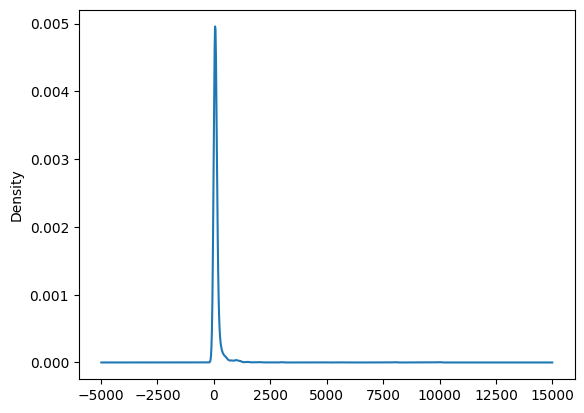

In [21]:
#Revision minimos y maximos price
listings.price.plot.kde()

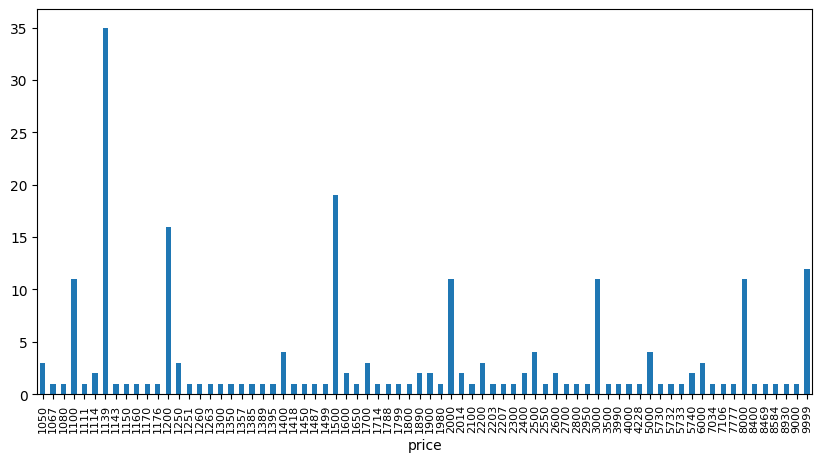

In [22]:
plt.figure(figsize=(10,5))
listings.price.loc[listings.price>1000].value_counts().sort_index().plot.bar();
plt.xticks(size=8);

Conclusión: 
    
* el valor 9999 normalmente suele ser una forma de imputar nulos, pero en este caso su frecuencia no está muy lejos de otros valores que pueden ser válidos, como el 8000, así que no lo eliminaré.

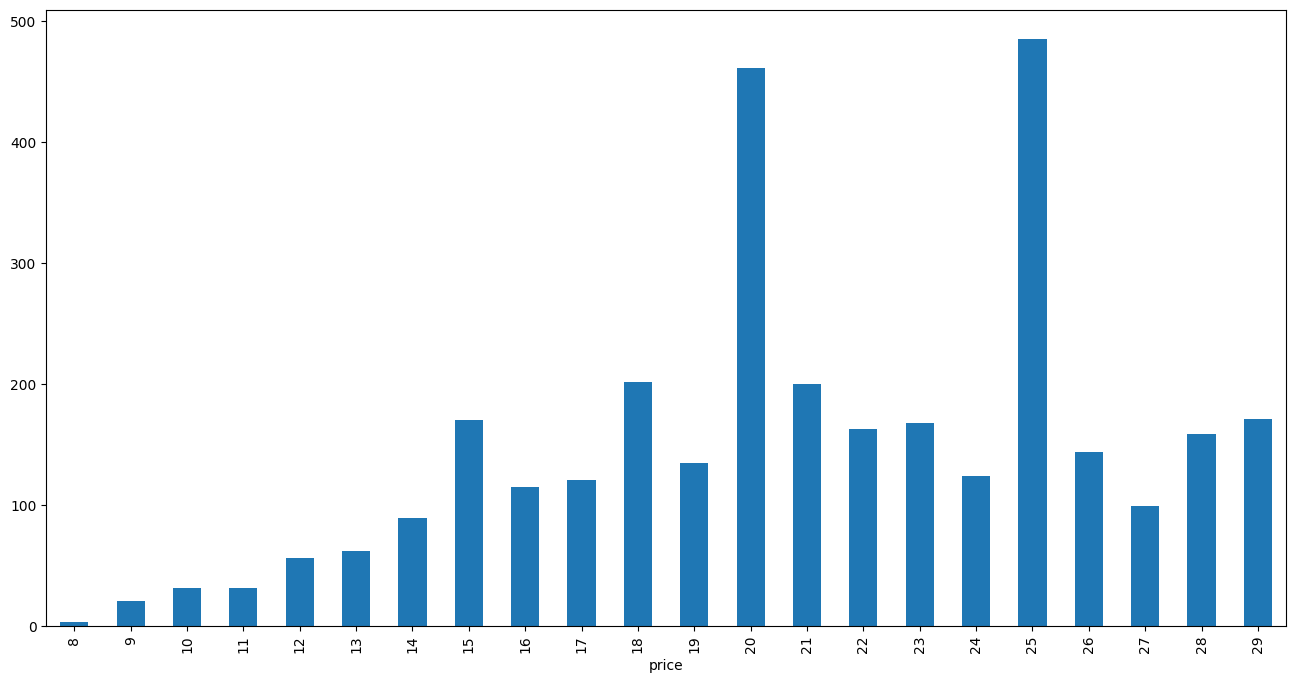

In [23]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price<30].value_counts().sort_index().plot.bar();

Conclusión: 
    
* Hay un pico en 20 euros, y parece que por debajo de esa cantidad sería difícil obtener rentabilidad, así que descartarto los inmuebles que se alquilan por debajo de 20 euros

In [24]:
listings=listings.loc[listings.price>19]

#### 3.1.6.2 Variable minimum_nights

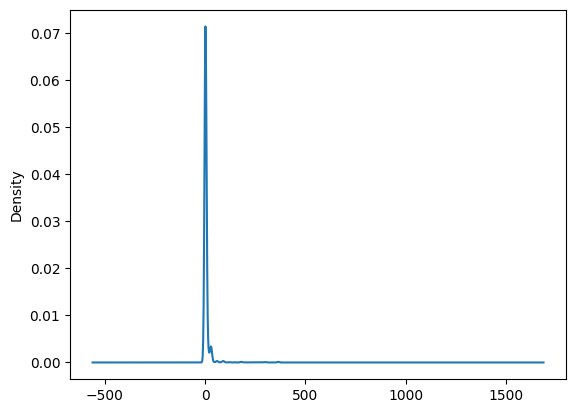

In [25]:
listings.minimum_nights.plot.kde();

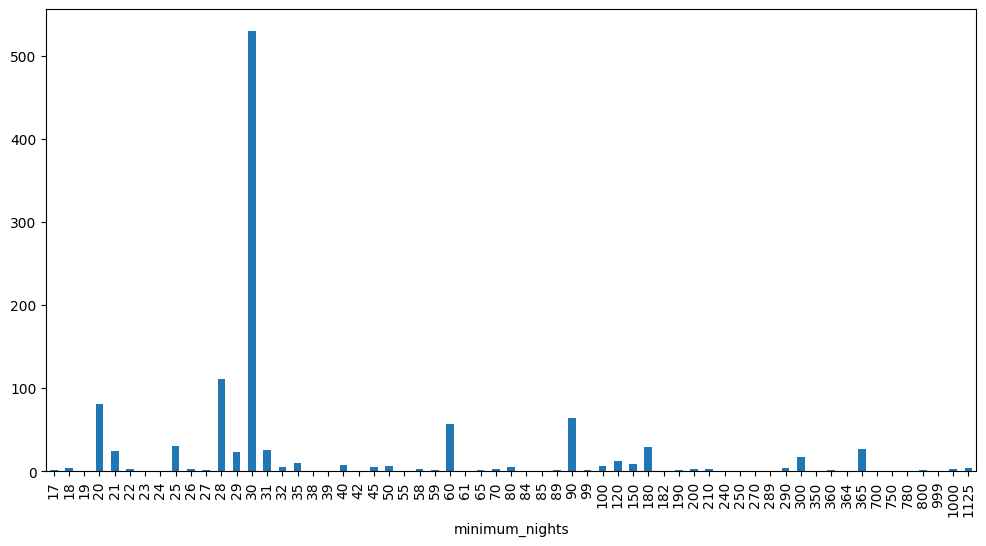

In [26]:
plt.figure(figsize=(12,6))
listings.minimum_nights.loc[listings.minimum_nights>16].value_counts().sort_index().plot.bar();

COnclusion:

* Hay un pico muy alto de minimo de noches en 30.Se investigará más adelante. De momento no elimino ningun valor.
* Aceptamos minimo de noches en 1.

#### 3.1.6.3 Variable calculated_host_listings_count

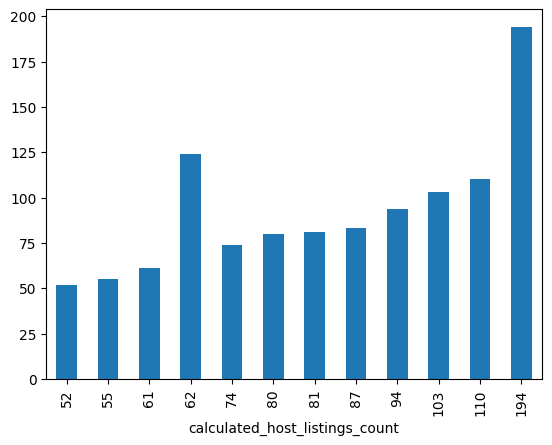

In [27]:
listings.calculated_host_listings_count.loc[listings.calculated_host_listings_count>50].value_counts().sort_index().plot.bar();

COnclusion:

* De momento no elimino nada porque no hay mucha diferencia entre los valores.

## 3.2 Calidad datos listings_det

In [28]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

### 3.2.1 Eliminación variables

In [29]:
#elimino variables que no aportan informacion:

a_incluir = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,a_incluir]

listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


### 3.2.2 Cambio tipo de variable

In [30]:
#Cambio tipo de variable

listings_det.host_is_superhost=listings_det.host_is_superhost.astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


### 3.2.3 Analisis de nulos

In [31]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

Conclusiones:
* Bathrooms esta llena de nulos, la elimino.
* description no aporta info importante, por lo que no afecta que tenga nulos.
* host_is_superhost tiene muy pocos nulos
* beds se puede imputar a partir de accomodates
* bedrooms sí es una variable importante,  intentaré imputar los nulos a través de proxies como accomodates o beds

#### 3.2.3.1 imputación de nulos beds

In [32]:
pd.crosstab(listings_det.beds,listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


Parece que sí se puede hacer una asignación mas o menos directa. Leyendo la matriz en vertical:

* una o dos personas se suelen corresponder con una cama
* tres o cuatro personas se suelen corresponder con dos camas
* cinco o seis personas se suelen corresponder con tres camas
* a más de 6 personas le vamos a poner cuatro camas

In [33]:
listings_det.beds.value_counts()

beds
1.0     8751
2.0     4805
3.0     2272
4.0     1186
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: count, dtype: int64

In [34]:
#Crear funcion para que impute los nulos en funcion de las habitaciones que tenga.
def quitar_nulos(registro):

    condiciones= [(registro.accommodates<=2),(registro.accommodates>2)&(registro.accommodates<=4),(registro.accommodates>4)&(registro.accommodates<=6),(registro.accommodates>6)]
    resultados=[1,2,3,4]

    return (np.select(condiciones,resultados,default=-999))



In [35]:
listings_det.loc[listings_det.beds.isna(),'beds']=listings_det.loc[listings_det.beds.isna()].apply(quitar_nulos,axis=1).astype('float')

In [36]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                               0
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

#### 3.2.3.2 Imputación nulos bedrooms

In [37]:
pd.crosstab(listings_det.bedrooms,listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
1.0,3009,5569,1141,2265,111,81,4,14,0,7,0,0,0,0,0,11
2.0,74,173,348,1560,444,852,51,48,4,6,1,0,0,1,0,0
3.0,21,22,45,104,220,509,106,158,7,20,4,13,1,2,1,0
4.0,16,21,1,12,18,38,34,96,10,39,2,15,5,2,0,2
5.0,9,6,0,0,4,3,4,6,9,34,3,8,1,3,3,12
6.0,3,3,0,0,0,1,0,1,3,4,2,1,1,1,2,2
7.0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,6
8.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


Conclusión:

* La mayoria de las veces hay una habitación cuando hay de 1 a 4 personas. No parece tener mucho sentido, a continuación realizo la tabla cruzada con la variable camas.

In [38]:
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna=False)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
def nulos_bedrooms(x):

    condiciones=[(x.beds<=2),
                 (x.beds<=4)&(x.beds>2),
                 (x.beds<=6)&(x.beds>4),
                 (x.beds>6)]
    resultados=[1,2,3,4]

    return(np.select(condiciones,resultados,default=-999))



In [40]:
listings_det.loc[listings_det.bedrooms.isna(),'bedrooms']=listings_det.loc[listings_det.bedrooms.isna()].apply(nulos_bedrooms,axis=1).astype('int64')

In [41]:
listings_det.bedrooms=listings_det.bedrooms.astype('int64')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     18909 non-null  int64   
 6   beds                         18909 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 1.5+ MB


In [42]:
listings_det.bedrooms.value_counts()

bedrooms
1     13540
2      3657
3      1244
4       311
5       105
6        24
7        11
8         7
9         3
10        3
14        2
15        1
18        1
Name: count, dtype: int64

#### 3.2.3.3 Eliminación variable bathrooms

In [43]:
listings_det.drop(columns='bathrooms',inplace=True)
listings.isna().sum()

id                                0
name                              3
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 3.2.4 Analisi de duplicados

In [44]:
listings_det.duplicated().sum()


0

### 3.2.5 Analisis variables categoricas

In [45]:
listings_det.select_dtypes('category').columns

Index(['host_is_superhost'], dtype='object')

In [46]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    15423
t     3460
Name: count, dtype: int64

### 3.2.6 Analisis de variables numericas

In [47]:
listings_det.select_dtypes('number').columns

Index(['id', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_communication',
       'review_scores_location'],
      dtype='object')

In [48]:
listings_det.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


Todas las variables tienen valores logicos, por loque procedo a unir los dos dataframes

## 3.3 Creación datamart analítico

In [49]:
listings.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [50]:
listings_det.columns

Index(['id', 'description', 'host_is_superhost', 'accommodates', 'bedrooms',
       'beds', 'number_of_reviews', 'review_scores_rating',
       'review_scores_communication', 'review_scores_location'],
      dtype='object')

In [51]:
listings.shape

(17710, 12)

In [52]:
listings_det.shape

(18909, 10)

Uniremos mediante el campo id obteneindo un df de 21 columnas y 17710 registros

In [53]:
df=pd.merge(left=listings,right=listings_det,how='left',on='id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,358,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1,0.0,0,NaN,NaN,NaN
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,358,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1,0.0,0,NaN,NaN,NaN
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,358,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1,0.0,0,NaN,NaN,NaN
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,358,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1,0.0,0,NaN,NaN,NaN


Uniremos el dataframe precio al df.

Primero deben coincidir los registros de distrito (precio) y neighbourhood_group(df)

In [54]:
precio.distrito=precio.distrito.astype('category')

In [55]:
df.loc[df.neighbourhood_group.isin(precio.distrito)].neighbourhood_group.nunique()

18

In [56]:
precio.distrito.nunique()

21

In [57]:
df.neighbourhood_group.nunique()

21

Vemos que hay 3 nombres de distrito que no estan igual escritos en las dos tablas.

In [58]:
df.loc[~df.neighbourhood_group.isin(precio.distrito)].neighbourhood_group.unique()

['Fuencarral - El Pardo', 'San Blas - Canillejas', 'Moncloa - Aravaca']
Categories (21, object): ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', ..., 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']

Conclusiones:

Los 3 distritos que se escriben diferente son:

* Fuencarral - El Pardo
* San Blas - Canillejas
* Moncloa - Aravaca

La referencia será como estan escritos en df, asi que cambio el texto en precio.

In [59]:
df.neighbourhood_group.unique().tolist()

['Chamartín',
 'Latina',
 'Arganzuela',
 'Centro',
 'Salamanca',
 'Puente de Vallecas',
 'Fuencarral - El Pardo',
 'Chamberí',
 'Villaverde',
 'Hortaleza',
 'Carabanchel',
 'Retiro',
 'Tetuán',
 'San Blas - Canillejas',
 'Ciudad Lineal',
 'Villa de Vallecas',
 'Barajas',
 'Usera',
 'Moncloa - Aravaca',
 'Moratalaz',
 'Vicálvaro']

In [60]:
precio.distrito.tolist()

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral',
 'Hortaleza',
 'Latina',
 'Moncloa',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

In [61]:
variables=['Fuencarral - El Pardo','San Blas - Canillejas','Moncloa - Aravaca']

precio.distrito=precio.distrito.replace({'Fuencarral':'Fuencarral - El Pardo','San Blas':'San Blas - Canillejas','Moncloa':'Moncloa - Aravaca'})

C:\Users\Pere\AppData\Local\Temp\ipykernel_10760\2271614512.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  precio.distrito=precio.distrito.replace({'Fuencarral':'Fuencarral - El Pardo','San Blas':'San Blas - Canillejas','Moncloa':'Moncloa - Aravaca'})


In [62]:
precio

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


In [63]:
df.loc[~df.neighbourhood_group.isin(precio.distrito)].neighbourhood_group.unique()

[], Categories (21, object): ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', ..., 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']

Ahora vemos que hay zero variables diferentes entre los dos dataframes, por lo tanto podemos unirlos sin que aparezcan nulos.

In [64]:
dm=pd.merge(left = df, right = precio, how = 'left', left_on='neighbourhood_group', right_on='distrito')
dm

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,t,2,1,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,f,1,1,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,f,6,3,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,f,3,1,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,f,1,1,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,f,1,1,0.0,0,NaN,NaN,NaN,6114,Salamanca


In [65]:
dm.isna().sum()

id                                   0
name                                 3
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
description                        944
host_is_superhost                   25
accommodates                         0
bedrooms                             0
beds                                 0
number_of_reviews                    0
review_scores_rating              4626
review_scores_communication       4847
review_scores_location            4850
precio_m2                            0
distrito                             0
dtype: int64

No hay nulos en las variables añadidas (precio_m2 y distrito) por lo que la union ha sido satisfactoria.


In [66]:
dm.to_sql('df',con=con,if_exists='replace')

17710